In [23]:
import pandas as pd

In [24]:
chunksize=10000
df = pd.read_csv('data/data.csv', chunksize=chunksize)
data_df=None
for data_df in df:
    data_df.dropna(inplace=True)
    data_df.drop_duplicates(keep='first', inplace=True)
    data_df.fillna(data_df.median(numeric_only=True), inplace=True) 
    data_df.fillna("Unknown", inplace=True)
    data_df.drop(columns=data_df.select_dtypes(include=['object', 'category']).columns, inplace=True) 
    data_df.to_csv("data/data_cleaned.csv", index=False)

In [25]:
from sklearn.model_selection import train_test_split
from data_load_and_cleaning import data_cleaning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
X = data_df.drop('Survived', axis=1)
y = data_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
        }

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results.append({
    "Model": name,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="weighted"),
    "Recall": recall_score(y_test, y_pred, average="weighted"),
    "F1 Score": f1_score(y_test, y_pred, average="weighted")
})

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from training import training


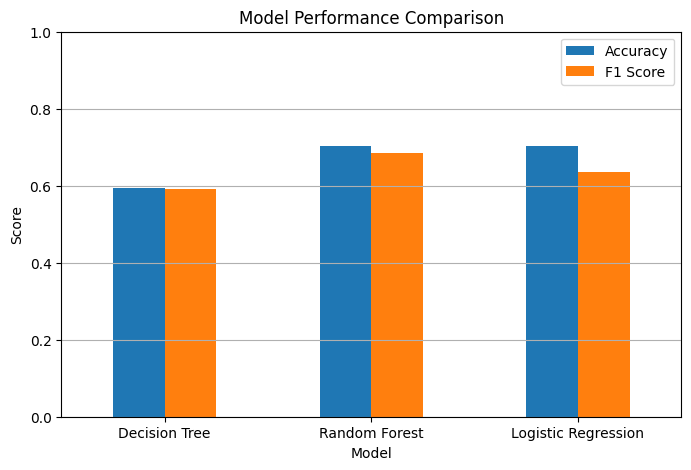

In [ ]:

results_df = pd.DataFrame(training())
results_df.to_csv("data/model_comparison_results.csv", index=False)
results_df.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind="bar", figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')    
plt.show()
plt.close() 
    
